# Stage_C_Quiz

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the dataset

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv')

In [3]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [4]:
df.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [5]:
# stab column is represented by stabf column, so stab column can be dropped

df.drop('stab', axis=1, inplace=True)

In [6]:
#slicing the dataset

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [8]:
#standard sclaer

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_train_df = scaler.fit_transform(x_train)
normalized_train_df = pd.DataFrame(normalized_train_df, columns = x_train.columns)

normalized_test_df = scaler.transform(x_test)
normalized_test_df = pd.DataFrame(normalized_test_df, columns=x_test.columns)

In [9]:
#random forest classifier

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=1)
forest.fit(normalized_train_df, y_train)
forest_predict = forest.predict(normalized_test_df)

In [10]:
from sklearn.metrics import classification_report

print(classification_report(y_test, forest_predict, digits=4))

              precision    recall  f1-score   support

      stable     0.9191    0.8778    0.8980       712
    unstable     0.9341    0.9573    0.9456      1288

    accuracy                         0.9290      2000
   macro avg     0.9266    0.9176    0.9218      2000
weighted avg     0.9288    0.9290    0.9286      2000



In [11]:
#extra tree classifier

from sklearn.ensemble import ExtraTreesClassifier

tree = ExtraTreesClassifier(random_state=1)
tree.fit(normalized_train_df, y_train)

tree_pred = tree.predict(normalized_test_df)

In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_test, tree_pred, zero_division=True, digits=6))

              precision    recall  f1-score   support

      stable   0.940994  0.851124  0.893805       712
    unstable   0.921829  0.970497  0.945537      1288

    accuracy                       0.928000      2000
   macro avg   0.931411  0.910810  0.919671      2000
weighted avg   0.928652  0.928000  0.927121      2000



In [13]:
#installing the lightgbm module

!pip install lightgbm

In [14]:
#lightgbm

from lightgbm import LGBMClassifier

light = LGBMClassifier(random_state=1)
light.fit(normalized_train_df, y_train)

light_pred = light.predict(normalized_test_df)

In [15]:
print(classification_report(y_test, light_pred, digits=4))

              precision    recall  f1-score   support

      stable     0.9276    0.9003    0.9138       712
    unstable     0.9458    0.9612    0.9534      1288

    accuracy                         0.9395      2000
   macro avg     0.9367    0.9307    0.9336      2000
weighted avg     0.9393    0.9395    0.9393      2000



In [16]:
#hyperparameters

n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None] 


hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [17]:
#Cross Validation

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesClassifier

In [18]:
tree2 = ExtraTreesClassifier(random_state=1)

clf = RandomizedSearchCV(tree2, hyperparameter_grid, cv=5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1, random_state=1)
search_result = clf.fit(normalized_train_df, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [19]:
# best hyperparameters from the randomized search CV
search_result.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': None}

In [20]:
tuned_tree = ExtraTreesClassifier(n_estimators=1000, min_samples_split=2, min_samples_leaf=8, max_features=None, random_state=1)

tuned_tree.fit(normalized_train_df, y_train)
tuned_tree_pred = tuned_tree.predict(normalized_test_df)

In [21]:
#classification for hyperparameter tuning

print(classification_report(y_test, tuned_tree_pred, digits=4))

              precision    recall  f1-score   support

      stable     0.9211    0.8694    0.8945       712
    unstable     0.9300    0.9589    0.9442      1288

    accuracy                         0.9270      2000
   macro avg     0.9256    0.9141    0.9193      2000
weighted avg     0.9268    0.9270    0.9265      2000



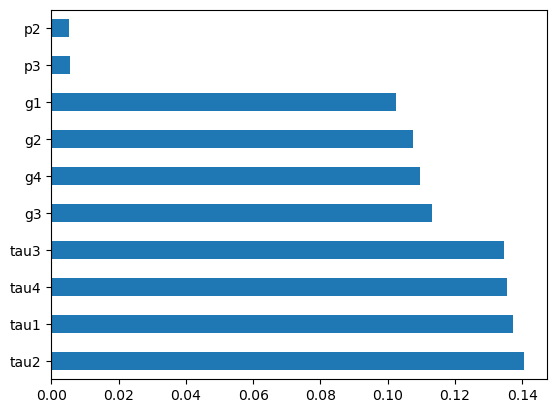

In [22]:
# plotting garph to know the feature importance

feature = pd.Series(tuned_tree.feature_importances_, index=X.columns)
feature.nlargest(10).plot(kind='barh')
plt.show()